Useful books and websites:
<br>
- Deep Learning Book
- Neural networks and deep learning website:
<br>
Proof of the universal theorem:
http://neuralnetworksanddeeplearning.com/chap4.html

Evaluating a classfication model:
<bt>
http://www.ritchieng.com/machine-learning-evaluate-classification-model/

could potential look at:
- Classification accuracy
- Confusion matrix
- Metrics computed from a confusion matrix
- Adjusting the classification threshold
- Receiver Operating Characteristic (ROC) Curves
- Area Under the Curve (AUC)

In [46]:
import time
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
from pandas import Series, DataFrame
import numpy as np 
np.set_printoptions(threshold= 10)
import tensorflow as tf
import seaborn as sns

import sklearn as skl
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
#import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# 1. Dimensions reduction

1) t-SNE

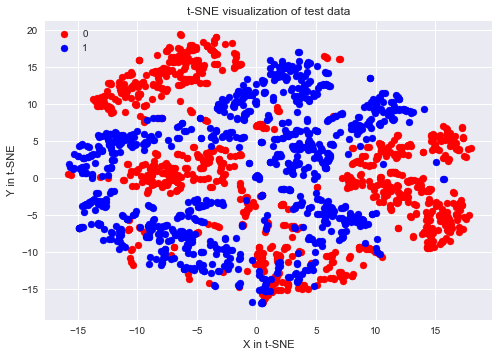

In [7]:
df = pd.read_csv(r"/Users/Florazhan/Desktop/Machine Learning/PD/CreditCardClients.csv")
df.rename(columns = {'default payment next month':'default'}, 
            inplace=True)

#Set df3 equal to a set of a sample of 1000 deafault and 1000 non-default observations.
df1 = df[df.default == 0].sample(n = 1000)
df2 = df[df.default == 1].sample(n = 1000)
df3 = pd.concat([df1, df2], axis = 0)

#Scale features to improve the training ability of TSNE.
standard_scaler = StandardScaler()
df3_std = standard_scaler.fit_transform(df3)

#Set y equal to the target values.
y = df3.ix[:,-1].values

tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(df3_std)

#Build the scatter plot with the two types of transactions.
color_map = {0:'red', 1:'blue'}
plt.figure()

for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = x_test_2d[y==cl,0], 
                y = x_test_2d[y==cl,1], 
                c = color_map[idx], 
                label = cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()

2) Dimension reducing using PCA:
<br>

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
<br>

PCA is a technique for reducing the number of dimensions in a dataset whilst retaining most information. It is using the correlation between some dimensions and tries to provide a minimum number of variables that keeps the maximum amount of variation or information about how the original data is distributed.

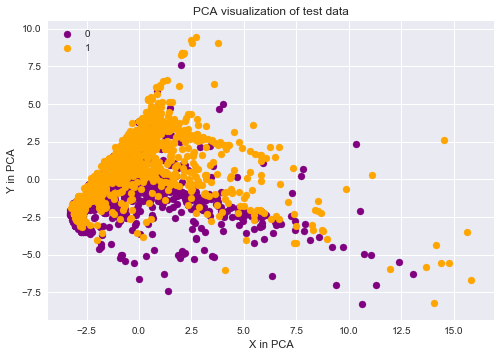

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_result = pca.fit_transform(df3_std)

color_map = {0:'purple', 1:'orange'}
plt.figure()
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = pca_result[y==cl,0], 
                y = pca_result[y==cl,1], 
                c = color_map[idx], 
                label = cl)
plt.xlabel('X in PCA')
plt.ylabel('Y in PCA')
plt.legend(loc='upper left')
plt.title('PCA visualization of test data')
plt.show()

In [213]:
df = pd.read_csv(r"/Users/Florazhan/Desktop/Machine Learning/PD/CreditCardClients.csv")
df.rename(columns = {'default payment next month':'default'}, 
            inplace=True)

df['rel_credit_usage_p1']  = df['BILL_AMT1'] / df['LIMIT_BAL']
df['rel_credit_usage_p2']  = df['BILL_AMT2'] / df['LIMIT_BAL']
df['rel_credit_usage_p3']  = df['BILL_AMT3'] / df['LIMIT_BAL']
df['rel_credit_usage_p4']  = df['BILL_AMT4'] / df['LIMIT_BAL']
df['rel_credit_usage_p5']  = df['BILL_AMT5'] / df['LIMIT_BAL']
df['rel_credit_usage_p6']  = df['BILL_AMT6'] / df['LIMIT_BAL']

df['rel_pay_bill1']   = df['PAY_AMT2']  / df['BILL_AMT1']
df['rel_pay_bill1']   = df['PAY_AMT3']  / df['BILL_AMT2']
df['rel_pay_bill1']   = df['PAY_AMT4']  / df['BILL_AMT3']
df['rel_pay_bill1']   = df['PAY_AMT5']  / df['BILL_AMT4']
df['rel_pay_bill1']   = df['PAY_AMT6']  / df['BILL_AMT5']

#df.drop(['ID'], axis = 1, inplace = True)
#df.drop(['ID',
        #'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
         #'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis = 1, inplace = True)

#df['rel_bill_pay_1'] = df['BILL_AMT2'] / df['PAY_AMT1']
#df['rel_bill_pay_2'] = df['BILL_AMT3'] / df['PAY_AMT2']
#df['rel_bill_pay_3'] = df['BILL_AMT4'] / df['PAY_AMT3']
#df['rel_bill_pay_4'] = df['BILL_AMT5'] / df['PAY_AMT4']
#df['rel_bill_pay_5'] = df['BILL_AMT6'] / df['PAY_AMT5']

print ('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (30000, 31)


In [33]:
#To check weather we have empty values in the spreadsheet
#df.isnull().sum()

In [10]:
print ("Age - Default :")
print (df.AGE[df.default == 1].describe())
print ()
print ("Age - NO default :")
print (df.AGE[df.default == 0].describe())


Age - Default :
count    6636.000000
mean       35.725738
std         9.693438
min        21.000000
25%        28.000000
50%        34.000000
75%        42.000000
max        75.000000
Name: AGE, dtype: float64

Age - NO default :
count    23364.000000
mean        35.417266
std          9.077355
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64


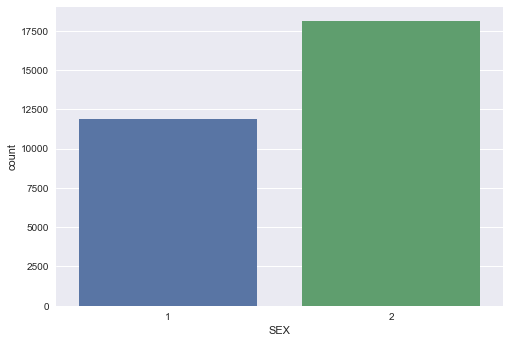

In [11]:
sns.countplot(x='SEX',data=df)

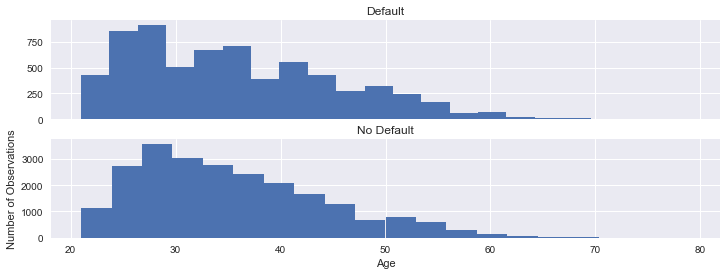

--- 0.438920259475708 seconds ---


In [12]:
import time
start_time = time.time()

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 20

ax1.hist(df.AGE[df.default == 1], bins = bins)
ax1.set_title('Default')

ax2.hist(df.AGE[df.default == 0], bins = bins)
ax2.set_title('No Default')

plt.xlabel('Age')
plt.ylabel('Number of Observations')
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

In [13]:
print ("Marriage - Default :")
print (df.MARRIAGE[df.default == 1].describe())
print ()
print ("Age - NO default :")
print (df.MARRIAGE[df.default == 0].describe())

Marriage - Default :
count    6636.000000
mean        1.528029
std         0.525433
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: MARRIAGE, dtype: float64

Age - NO default :
count    23364.000000
mean         1.558637
std          0.520794
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: MARRIAGE, dtype: float64


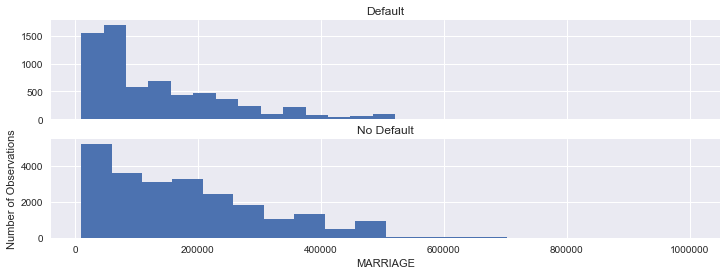

--- 0.43524789810180664 seconds ---


In [14]:
import time
start_time = time.time()

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 20

ax1.hist(df.LIMIT_BAL[df.default == 1], bins = bins)
ax1.set_title('Default')

ax2.hist(df.LIMIT_BAL[df.default == 0], bins = bins)
ax2.set_title('No Default')

plt.xlabel('MARRIAGE')
plt.ylabel('Number of Observations')
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

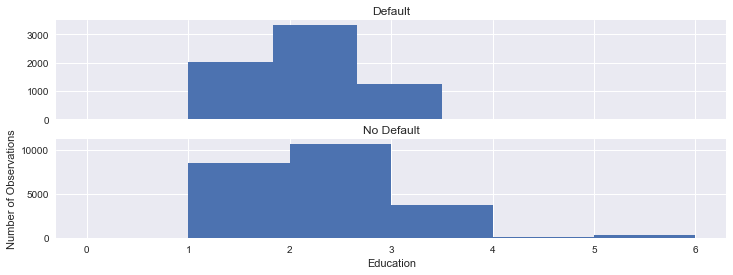

--- 0.36876392364501953 seconds ---


In [97]:
import time
start_time = time.time()

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 6 # there are 6 types of education

ax1.hist(df.EDUCATION[df.default == 1], bins = bins)
ax1.set_title('Default')

ax2.hist(df.EDUCATION[df.default == 0], bins = bins)
ax2.set_title('No Default')

plt.xlabel('Education')
plt.ylabel('Number of Observations')
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

In [15]:
df = pd.read_csv(r"/Users/Florazhan/Desktop/Machine Learning/PD/CreditCardClients.csv")
df.rename(columns = {'default payment next month':'default'}, 
            inplace=True)

df.drop(['ID'], axis = 1, inplace = True)

In [16]:
#Create a new Class for Non Default observations.
df.loc[df.default == 0, 'nonDefault'] = 1
df.loc[df.default == 1, 'nonDefault'] = 0

print(df.default.value_counts())
print()
print(df.nonDefault.value_counts())

0    23364
1     6636
Name: default, dtype: int64

1.0    23364
0.0     6636
Name: nonDefault, dtype: int64


In [17]:
#Create dataframes of only default and nonDefault observations.
Default = df[df.default == 1]
NonDefault = df[df.nonDefault == 1]

# Set X_train equal to 80% of the observations that defaulted.
X_train = Default.sample(frac=0.8)
count_Defaults = len(X_train)

# Add 80% of the not-defaulted observations to X_train.
X_train = pd.concat([X_train, NonDefault.sample(frac = 0.8)], axis = 0)

# X_test contains all the observations not in X_train.
X_test = df.loc[~df.index.isin(X_train.index)]

#Shuffle the dataframes so that the training is done in a random order.
X_train = shuffle(X_train)
X_test = shuffle(X_test)

#Add our target classes to y_train and y_test.
y_train = X_train.default
y_train = pd.concat([y_train, X_train.nonDefault], axis=1)

y_test = X_test.default
y_test = pd.concat([y_test, X_test.nonDefault], axis=1)

#Drop target classes from X_train and X_test.
X_train = X_train.drop(['default','nonDefault'], axis = 1)
X_test = X_test.drop(['default','nonDefault'], axis = 1)

#Check to ensure all of the training/testing dataframes are of the correct length
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

# CHECKED !

#Names of all of the features in X_train.
features = X_train.columns.values

#Transform each feature in features so that it has a mean of 0 and standard deviation of 1; 
#this helps with training the neural network.
for feature in features:
    mean, std = df[feature].mean(), df[feature].std()
    X_train.loc[:, feature] = (X_train[feature] - mean) / std
    X_test.loc[:, feature] = (X_test[feature] - mean) / std
    
# Split the testing data into validation and testing sets
split = int(len(y_test)/2)

inputX = X_train.as_matrix()
inputY = y_train.as_matrix()
inputX_valid = X_test.as_matrix()[:split]
inputY_valid = y_test.as_matrix()[:split]
inputX_test = X_test.as_matrix()[split:]
inputY_test = y_test.as_matrix()[split:]

24000
24000
6000
6000


In [226]:
print (len(X_train.columns))
print (X_train.columns)

23
Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')


First train the dataset with 3 hidden layers

In [57]:
# Number of input nodes.
input_nodes = len(X_train.columns)

# Multiplier maintains a fixed ratio of nodes between each layer.
mulitplier = 3 

# Number of nodes in each hidden layer
hidden_nodes1 = len(X_train.columns)
hidden_nodes2 = round(hidden_nodes1 * mulitplier)
hidden_nodes3 = round(hidden_nodes2 * mulitplier)

# Percent of nodes to keep during dropout.
pkeep = tf.placeholder(tf.float32)

# input
x = tf.placeholder(tf.float32, [None, input_nodes])

# layer 1
W1 = tf.Variable(tf.truncated_normal([input_nodes, hidden_nodes1], stddev = 0.15))
b1 = tf.Variable(tf.zeros([hidden_nodes1]))
y1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)

# layer 2
W2 = tf.Variable(tf.truncated_normal([hidden_nodes1, hidden_nodes2], stddev = 0.15))
b2 = tf.Variable(tf.zeros([hidden_nodes2]))
y2 = tf.nn.sigmoid(tf.matmul(y1, W2) + b2)

# layer 3
W3 = tf.Variable(tf.truncated_normal([hidden_nodes2, hidden_nodes3], stddev = 0.15)) 
b3 = tf.Variable(tf.zeros([hidden_nodes3]))
y3 = tf.nn.sigmoid(tf.matmul(y2, W3) + b3)
y3 = tf.nn.dropout(y3, pkeep)

# layer 4
W4 = tf.Variable(tf.truncated_normal([hidden_nodes3, 2], stddev = 0.15)) 
b4 = tf.Variable(tf.zeros([2]))
y4 = tf.nn.softmax(tf.matmul(y3, W4) + b4)

# output
y = y4
y_ = tf.placeholder(tf.float32, [None, 2])

# Parameters
training_epochs = 35 # These proved to be enough to let the network learn
training_dropout = 0.9
display_step = 1 # 10 
n_samples = y_train.shape[0]
batch_size = 2000
learning_rate = 0.01

# Cost function: Cross Entropy
cost = -tf.reduce_sum(y_ * tf.log(y))

# We will optimize our model via AdamOptimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# Correct prediction if the most likely value (default or non Default) from softmax equals the target value.
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

###### Train the network
accuracy_summary = [] # Record accuracy values for plot
cost_summary = [] # Record cost values for plot
valid_accuracy_summary = [] 
valid_cost_summary = [] 
stop_early = 0 # To keep track of the number of epochs before early stopping

#def truepreddiff (prediction, actual):
    
    #diff = []
    #for i in range (len(df['target'])):
        #if prediction[i] == df['target'][i]
        #return (s)
        
        #else
        #return (d)



# Initialize variables and tensorflow session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs): 
        for batch in range(int(n_samples/batch_size)):
            batch_x = inputX[batch*batch_size : (1+batch)*batch_size]
            batch_y = inputY[batch*batch_size : (1+batch)*batch_size]

            sess.run([optimizer], feed_dict={x: batch_x, 
                                             y_: batch_y,
                                             pkeep: training_dropout})

        # Display logs after every 10 epochs
        if (epoch) % display_step == 0:
            train_accuracy, newCost = sess.run([accuracy, cost], feed_dict={
                x: inputX, y_: inputY, pkeep: training_dropout})

            valid_accuracy, valid_newCost = sess.run([accuracy, cost], feed_dict={
                x: inputX_valid, y_: inputY_valid, pkeep: 1})
            
            
            print ("Epoch:", epoch,
                   "Acc =", "{:.5f}".format(train_accuracy), 
                   "Cost =", "{:.5f}".format(newCost)) #,
                   #"Valid_Acc =", "{:.5f}".format(valid_accuracy), 
                   #"Valid_Cost = ", "{:.5f}".format(valid_newCost))
            
            prediction = sess.run(tf.argmax(y, 1), feed_dict={x: batch_x, y:batch_y})
            print ("PD predictions:", prediction)
            print (len(prediction))
            
            
            #plt.scatter(df['ID'], predictions, color = 'blue')
            #plt.scatter(df['ID'], df['default payment next month'], color = 'red')
            #plt.legend(loc='lower right')
            #plt.plot([0,1],[0,1], color='black', linestyle='--')
            #plt.xlim([-0.05,1.0])
            #plt.ylim([-0.02,1.1])
            #plt.ylabel('ID')
            #plt.xlabel('Default')
            #plt.show()
              
            #print ("PD predictions:", prediction.eval(feed_dict={x:batch_x, y:batch_y}))
            
            #pred_proba = optimizer.predict_proba(input_fn=lambda: input_fn(df))
            #print ("Probabilities:", pred_proba)
            print ("---------------------------------------------")
            
            # Record the results of the model
            accuracy_summary.append(train_accuracy)
            cost_summary.append(newCost)
            valid_accuracy_summary.append(valid_accuracy)
            valid_cost_summary.append(valid_newCost)
            
            # If the model does not improve after 15 logs, stop the training.
            if valid_accuracy < max(valid_accuracy_summary) and epoch > 100:
                stop_early += 1
                if stop_early == 15:
                    break
            else:
                stop_early = 0
              

Epoch: 0 Acc = 0.77854 Cost = 12819.02441
PD predictions: [1 1 1 ..., 1 0 1]
2000
---------------------------------------------
Epoch: 1 Acc = 0.76796 Cost = 13377.42480
PD predictions: [1 1 1 ..., 1 0 1]
2000
---------------------------------------------
Epoch: 2 Acc = 0.78067 Cost = 12330.94922
PD predictions: [1 1 1 ..., 1 0 1]
2000
---------------------------------------------
Epoch: 3 Acc = 0.78192 Cost = 11757.37695
PD predictions: [1 1 1 ..., 1 0 1]
2000
---------------------------------------------
Epoch: 4 Acc = 0.79167 Cost = 11478.58789
PD predictions: [1 1 1 ..., 1 0 1]
2000
---------------------------------------------
Epoch: 5 Acc = 0.79950 Cost = 11241.35156
PD predictions: [1 1 1 ..., 1 0 1]
2000
---------------------------------------------
Epoch: 6 Acc = 0.80592 Cost = 11142.97168
PD predictions: [1 1 1 ..., 1 0 1]
2000
---------------------------------------------
Epoch: 7 Acc = 0.80971 Cost = 11039.61816
PD predictions: [1 1 1 ..., 1 0 1]
2000
----------------------

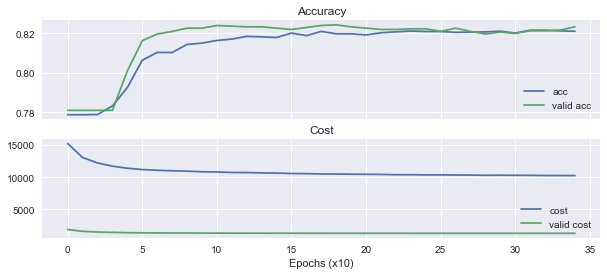

In [43]:
# Plot the accuracy and cost summaries 
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

ax1.plot(accuracy_summary, label='acc') # blue
ax1.plot(valid_accuracy_summary, label = 'valid acc') # green
ax1.set_title('Accuracy')
ax1.legend(loc='lower right')
#ax1.set_ylabel('')

ax2.plot(cost_summary, label = 'cost')
ax2.plot(valid_cost_summary, label = 'valid cost')
ax2.set_title('Cost')

ax2.legend(loc='lower right')
plt.xlabel('Epochs (x10)')
plt.show()

--------------------------------------------------------------------------

Build and test the model:
<br>
Use no hidden layers, the neural network would be same as the logistic regression, let's first compare the results

# No hidden layer

In [56]:
#from tf.contrib.learn import LinearClassifer

input_nodes = 24

x = tf.placeholder(tf.float32, [None, input_nodes])
y_ = tf.placeholder(tf.float32, [None, 2])

W1 = tf.Variable(tf.truncated_normal([input_nodes, 2], stddev = 0.15))
b1 = tf.Variable(tf.zeros([2]))
y = tf.matmul(x, W1) + b1


#training_epochs = 30 


# Cost function: Cross Entropy
cost = -tf.reduce_sum(y_ * tf.log(y))

# Train our model via AdamOptimizer
train_step = tf.contrib.learn.LinearClassifier(learning_rate)

optimizer = tf.train.FtrlOptimizer(learning_rate=0.1,
    l1_regularization_strength=1.0,
    l2_regularization_strength=1.0,
  model_dir=model_dir)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())

    sess.run([train_step], feed_dict={x: batch_x, 
                                             y_: batch_y})
        
    train_accuracy, newCost = sess.run([accuracy, cost], feed_dict={x: inputX, 
                                                                            y_: inputY})
        
    prediction = sess.run(tf.argmax(y, 1), feed_dict={x: batch_x, y:batch_y})
    print ("PD predictions:", prediction)
        #print ("PD predictions:", prediction.eval(feed_dict={x:batch_x, y:batch_y}))
    print ("---------------------------------------------")



TypeError: 'float' object is not iterable

In [50]:
#from tf.contrib.learn import LinearClassifer

input_nodes = 24

x = tf.placeholder(tf.float32, [None, input_nodes])
y_ = tf.placeholder(tf.float32, [None, 2])

W1 = tf.Variable(tf.truncated_normal([input_nodes, 2], stddev = 0.15))
b1 = tf.Variable(tf.zeros([2]))
y = tf.matmul(x, W1) + b1


# Parameters
training_epochs = 30 # These proved to be enough to let the network learn
training_dropout = 0.9
display_step = 1 # 10 
n_samples = y_train.shape[0]
batch_size = 2000
learning_rate = 0.2

# Cost function: Cross Entropy

cost = -tf.reduce_sum(y_ * tf.log(y))

# Train our model via AdamOptimizer
train_step = tf.contrib.learn.LinearClassifier(learning_rate)
#l1_regularization_strength=1.0,
    #l2_regularization_strength=1.0)
#train_step = tf.train.AdamOptimizer(learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

###### Train the network
accuracy_summary = [] # Record accuracy values for plot
cost_summary = [] # Record cost values for plot
valid_accuracy_summary = [] 
valid_cost_summary = [] 
stop_early = 0 # To keep track of the number of epochs before early stopping

# Initialize variables and tensorflow session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs): 
        for batch in range(int(n_samples/batch_size)):
            batch_x = inputX[batch*batch_size : (1+batch)*batch_size]
            batch_y = inputY[batch*batch_size : (1+batch)*batch_size]

            sess.run([train_step], feed_dict={x: batch_x, 
                                             y_: batch_y})

        # Display logs after every 10 epochs
        if (epoch) % display_step == 0:
            train_accuracy, newCost = sess.run([accuracy, cost], feed_dict={x: inputX, 
                                                                            y_: inputY})

            valid_accuracy, valid_newCost = sess.run([accuracy, cost], feed_dict={x: inputX_valid, 
                                                                                  y_: inputY_valid})
            
            print("With no hidden layers (logistic regression)")
            print ("Epoch:", epoch,
                   "Acc =", "{:.5f}".format(train_accuracy), 
                   "Cost =", "{:.5f}".format(newCost)) #,
                   #"Valid_Acc =", "{:.5f}".format(valid_accuracy), 
                   #"Valid_Cost = ", "{:.5f}".format(valid_newCost))
            
            prediction = sess.run(tf.argmax(y, 1), feed_dict={x: batch_x, y:batch_y})
            print ("PD predictions:", prediction)
            #print ("PD predictions:", prediction.eval(feed_dict={x:batch_x, y:batch_y}))
            print ("---------------------------------------------")
            
        
            # Record the results of the model
            accuracy_summary.append(train_accuracy)
            cost_summary.append(newCost)
            valid_accuracy_summary.append(valid_accuracy)
            valid_cost_summary.append(valid_newCost)
            
            # If the model does not improve after 15 logs, stop the training.
            if valid_accuracy < max(valid_accuracy_summary) and epoch > 100:
                stop_early += 1
                if stop_early == 15:
                    break
            else:
                stop_early = 0



TypeError: 'float' object is not iterable

# One hidden layer

In [174]:
input_nodes = 24
hidden_nodes1 = 24


pkeep = tf.placeholder(tf.float32)

x = tf.placeholder(tf.float32, [None, input_nodes])
y_ = tf.placeholder(tf.float32, [None, 2])

# layer 1
W1 = tf.Variable(tf.truncated_normal([input_nodes, hidden_nodes1], stddev = 0.15))
b1 = tf.Variable(tf.zeros([hidden_nodes1]))
y1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)
# Percent of nodes to keep during dropout.
pkeep = tf.placeholder(tf.float32)

# layer 2
W2 = tf.Variable(tf.truncated_normal([hidden_nodes1, 2], stddev = 0.15))
b2 = tf.Variable(tf.zeros([2]))
y2 = tf.nn.softmax(tf.matmul(y1, W2) + b2)
#y2 = tf.nn.sigmoid(tf.matmul(y1, W2) + b2)

# output
y = y2


# Parameters
training_epochs = 35 # These proved to be enough to let the network learn
training_dropout = 0.9
display_step = 1 # 10 
n_samples = y_train.shape[0]
batch_size = 2048
learning_rate = 0.01

# Cost function: Cross Entropy
cost = -tf.reduce_sum(y_ * tf.log(y))

# Train our model via AdamOptimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

accuracy_summary = [] # Record accuracy values for plot
cost_summary = [] # Record cost values for plot
valid_accuracy_summary = [] 
valid_cost_summary = [] 
stop_early = 0 # To keep track of the number of epochs before early stopping

# Initialize variables and tensorflow session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs): 
        for batch in range(int(n_samples/batch_size)):
            batch_x = inputX[batch*batch_size : (1+batch)*batch_size]
            batch_y = inputY[batch*batch_size : (1+batch)*batch_size]

            sess.run([optimizer], feed_dict={x: batch_x, 
                                             y_: batch_y})

        # Display logs after every 10 epochs
        if (epoch) % display_step == 0:
            train_accuracy, newCost = sess.run([accuracy, cost], feed_dict={x: inputX, 
                                                                            y_: inputY})

            valid_accuracy, valid_newCost = sess.run([accuracy, cost], feed_dict={x: inputX_valid, 
                                                                                  y_: inputY_valid})
            
            
            print ("Epoch:", epoch,
                   "Acc =", "{:.5f}".format(train_accuracy), 
                   "Cost =", "{:.5f}".format(newCost),
                   "Valid_Acc =", "{:.5f}".format(valid_accuracy), 
                   "Valid_Cost = ", "{:.5f}".format(valid_newCost))
            
            #prediction = sess.run(tf.argmax(y, 1), feed_dict={x: batch_x})
            #print ("PD predictions:", prediction)
            #print ("PD predictions:", prediction.eval(feed_dict={x:batch_x, y:batch_y}))
            print ("---------------------------------------------")
            
            # Record the results of the model
            accuracy_summary.append(train_accuracy)
            cost_summary.append(newCost)
            valid_accuracy_summary.append(valid_accuracy)
            valid_cost_summary.append(valid_newCost)
            
            # If the model does not improve after 15 logs, stop the training.
            if valid_accuracy < max(valid_accuracy_summary) and epoch > 100:
                stop_early += 1
                if stop_early == 15:
                    break
            else:
                stop_early = 0
              

Epoch: 0 Acc = 0.77942 Cost = 12115.29102 Valid_Acc = 0.77867 Valid_Cost =  1511.55762
---------------------------------------------
Epoch: 1 Acc = 0.80167 Cost = 11544.29883 Valid_Acc = 0.80200 Valid_Cost =  1431.12256
---------------------------------------------
Epoch: 2 Acc = 0.80258 Cost = 11329.32617 Valid_Acc = 0.79900 Valid_Cost =  1406.84985
---------------------------------------------
Epoch: 3 Acc = 0.79450 Cost = 11239.99414 Valid_Acc = 0.79033 Valid_Cost =  1399.09509
---------------------------------------------
Epoch: 4 Acc = 0.80242 Cost = 11156.61719 Valid_Acc = 0.79800 Valid_Cost =  1389.08911
---------------------------------------------
Epoch: 5 Acc = 0.80313 Cost = 11104.66699 Valid_Acc = 0.80033 Valid_Cost =  1382.93506
---------------------------------------------
Epoch: 6 Acc = 0.80738 Cost = 11065.80469 Valid_Acc = 0.80167 Valid_Cost =  1378.25049
---------------------------------------------
Epoch: 7 Acc = 0.80829 Cost = 11039.40137 Valid_Acc = 0.80400 Valid_C

# Two hidden layers

In [175]:
input_nodes = 24
mulitplier = 3 

# Number of nodes in each hidden layer
hidden_nodes1 = 24
hidden_nodes2 = round(hidden_nodes1 * mulitplier)

pkeep = tf.placeholder(tf.float32)

# input
x = tf.placeholder(tf.float32, [None, input_nodes])
y_ = tf.placeholder(tf.float32, [None, 2])

# layer 1
W1 = tf.Variable(tf.truncated_normal([input_nodes, hidden_nodes1], stddev = 0.15))
b1 = tf.Variable(tf.zeros([hidden_nodes1]))
y1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)

# layer 2
W2 = tf.Variable(tf.truncated_normal([hidden_nodes1, hidden_nodes2], stddev = 0.15))
b2 = tf.Variable(tf.zeros([hidden_nodes2]))
y2 = tf.nn.sigmoid(tf.matmul(y1, W2) + b2)
y2 = tf.nn.dropout(y2, pkeep)

# layer 3
W3 = tf.Variable(tf.truncated_normal([hidden_nodes2, 2], stddev = 0.15)) 
b3 = tf.Variable(tf.zeros([2]))
y3 = tf.nn.softmax(tf.matmul(y3, W4) + b4)

# output
y = y3


# Parameters
training_epochs = 35 # These proved to be enough to let the network learn
training_dropout = 0.9
display_step = 1 # 10 
n_samples = y_train.shape[0]
batch_size = 2048
learning_rate = 0.01

# Cost function: Cross Entropy
cost = -tf.reduce_sum(y_ * tf.log(y))

# We will optimize our model via AdamOptimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# Correct prediction if the most likely value (default or non Default) from softmax equals the target value.
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

###### Train the network
accuracy_summary = [] # Record accuracy values for plot
cost_summary = [] # Record cost values for plot
valid_accuracy_summary = [] 
valid_cost_summary = [] 
stop_early = 0 # To keep track of the number of epochs before early stopping

# Initialize variables and tensorflow session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs): 
        for batch in range(int(n_samples/batch_size)):
            batch_x = inputX[batch*batch_size : (1+batch)*batch_size]
            batch_y = inputY[batch*batch_size : (1+batch)*batch_size]

            sess.run([optimizer], feed_dict={x: batch_x, 
                                             y_: batch_y,
                                             pkeep: training_dropout})

        # Display logs after every 10 epochs
        if (epoch) % display_step == 0:
            train_accuracy, newCost = sess.run([accuracy, cost], feed_dict={x: inputX, 
                                                                            y_: inputY,
                                                                            pkeep: training_dropout})

            valid_accuracy, valid_newCost = sess.run([accuracy, cost], feed_dict={x: inputX_valid, 
                                                                                  y_: inputY_valid,
                                                                                  pkeep: 1})
            
            
            print ("Epoch:", epoch,
                   "Acc =", "{:.5f}".format(train_accuracy), 
                   "Cost =", "{:.5f}".format(newCost),
                   "Valid_Acc =", "{:.5f}".format(valid_accuracy), 
                   "Valid_Cost = ", "{:.5f}".format(valid_newCost))
            
            #prediction = sess.run(tf.argmax(y, 1), feed_dict={x: batch_x})
            #print ("PD predictions:", prediction)
            #print ("PD predictions:", prediction.eval(feed_dict={x:batch_x, y:batch_y}))
            print ("---------------------------------------------")
            
            # Record the results of the model
            accuracy_summary.append(train_accuracy)
            cost_summary.append(newCost)
            valid_accuracy_summary.append(valid_accuracy)
            valid_cost_summary.append(valid_newCost)
            
            # If the model does not improve after 15 logs, stop the training.
            if valid_accuracy < max(valid_accuracy_summary) and epoch > 100:
                stop_early += 1
                if stop_early == 15:
                    break
            else:
                stop_early = 0
              

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_198' with dtype float
	 [[Node: Placeholder_198 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_198', defined at:
  File "//anaconda/envs/tensorflow/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "//anaconda/envs/tensorflow/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-165-3c3227302cf4>", line 13, in <module>
    pkeep = tf.placeholder(tf.float32)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1507, in placeholder
    name=name)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1997, in _placeholder
    name=name)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_198' with dtype float
	 [[Node: Placeholder_198 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [114]:
import time
start_time = time.time()

n_input = 33
n_output = 2

sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, input_nodes])
y_= tf.placeholder(tf.float32, shape=[None, 2])

W = tf.Variable(tf.truncated_normal([input_nodes, output_nodes]))
b = tf.Variable(tf.zeros([output_nodes]))
               
#use sigmoid(logistic regression)
y1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)
                
sess.run(tf.global_variables_initializer())

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

learning_rate = 0.1
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
 
epochs = 10000
batch_size = 2000

for epoch in range(epochs):
    #for batch in range(int(n_samples/batch_size)):
        #batch_x = inputX[batch*batch_size : (1+batch)*batch_size]
        #batch_y = inputY[batch*batch_size : (1+batch)*batch_size]
        
        #batch_x = X_train.train.next_batch(100)
        #batch_y = Y_train.train.next_batch(100)
        
        #sess.run([train_step], feed_dict={x: batch_x, y_: batch_y})
        train_step.run(feed_dict={x: X_train, y_: Y_train})

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
                
print(accuracy.eval(feed_dict = {x: X_train,
                                y: Y_train}))
prediction = tf.argmax(y,1)
print ("predictions", prediction.eval(feed_dict={x:batch_x, y: batch_y}))
print("--- %s seconds ---" % (time.time() - start_time))

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_129' with dtype float
	 [[Node: Placeholder_129 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_129', defined at:
  File "//anaconda/envs/tensorflow/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "//anaconda/envs/tensorflow/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-112-e6afc3202262>", line 13, in <module>
    pkeep = tf.placeholder(tf.float32)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1507, in placeholder
    name=name)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1997, in _placeholder
    name=name)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "//anaconda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_129' with dtype float
	 [[Node: Placeholder_129 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [54]:
import time
start_time = time.time()

input_nodes = 32
x = tf.placeholder(tf.float32, [None, input_nodes])

w1 = tf.Variable(tf.truncated_normal([input_nodes, hidden_nodes1], stddev = 0.15))
b1 = tf.Variable(tf.zeros([hidden_nodes1]))
y1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)

#output
y = y1
y_ = tf.placeholder(tf.float32, [None, 2])

#Cost funcion: Cross Entropy for now 
cost = -tf.reduce_sum(y_ * tf.log(y))
learning_rate
epsilon = 0.01
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#Parameters
training_epochs = 20
training_dropout = 0.9
display_step = 1
n_samles = Y_train.shape[0]
#Batch size defines the number of samples that going to be propagated through the network
batch_size = 1000

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

accuracy_summary = [] # Record accuracy values for plot
cost_summary = [] # Record cost values for plot
valid_accuracy_summary = [] 
valid_cost_summary = [] 
stop_early = 0 # To keep track of the number of epochs before early stopping

with tf.Session as sess:
    
    init = tf.global_variables_initializer() 
    sess.run(init)
    
    for epoch in range(training_epochs):
        for batch in range(int(n_samples/batch_size)):
            batch_x = inputX[batch*batch_size :(1+batch)*batch_size]
            batch_y = inputY[batch*batch_size :(1+batch)*batch_size]
            
            sess.run([train, feed_dict={x: batch_x, y_:batch_y}])
        
        if (epoch)% display_step == 0:
            
            train_accuracy, newCost == sess.run([accuracy, cost], 
            feed_dict={x: batch_x, y_:batch_y})
            
            valid_accuracy, valid_newCost = sess.run([accuracy, cost],
            feed_dict={x: inputX_valid, y_: inputY_valid})
        
        print ("Epoch:", epoch,
                   "Acc =", "{:.5f}".format(train_accuracy), 
                   "Cost =", "{:.5f}".format(newCost),
                   "Valid_Acc =", "{:.5f}".format(valid_accuracy), 
                   "Valid_Cost = ", "{:.5f}".format(valid_newCost))
        
        accuracy_summary.append(train_accuracy)
            cost_summary.append(newCost)
            valid_accuracy_summary.append(valid_accuracy)
            valid_cost_summary.append(valid_newCost)
            
            # If the model does not improve after 15 logs, stop the training.
            if valid_accuracy < max(valid_accuracy_summary) and epoch > 100:
                stop_early += 1
                if stop_early == 15:
                    break
            else:
                stop_early = 0
            
    print()
    print("Optimization Finished!")
    print()   

print("--- %s seconds ---" % (time.time() - start_time))

SyntaxError: invalid syntax (<ipython-input-54-ac89781ed30c>, line 48)

In [42]:
import time
start_time = time.time()

input_neurons = 32
hidden_neurons = 3
output_neurons = 2
epochs = 100

#Create placeholders
x = tf.placeholder(tf.float32, shape=[None, input_neurons])
y = tf.placeholder(tf.float32, shape=[None, 1])

# First layer: Connect the inputs to hidden units
w1 = tf.Variable(tf.truncated_normal([input_neurons, hidden_neurons]))
b1 = tf.Variable(tf.zeros([hidden_neurons]))
y1 = tf.nn.sigmoid(tf.matmul(x, w1) + b1)

W2 = tf.Variable(tf.truncated_normal([hidden_neurons, 2], stddev = 0.15))
b2 = tf.Variable(tf.zeros([hidden_nodes2]))
y2 = tf.nn.sigmoid(tf.matmul(y1, W2) + b2)

w3 = tf.Variable(tf.truncated_normal([2, 1]))
b3 = tf.Variable(tf.zeros([1]))
y3 = tf.nn.sigmoid(tf.matmul(y2, w3) + b3)

#Cost funcion: Cross Entropy for now 
cost = -tf.reduce_sum(y_ * tf.log(y))
epsilon = 0.01
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

#optimizer = tf.train.AdamOptimizer(epsilon).minimize(cost)


#error_function = 0.5 * tf.reduce_sum(tf.subtract(y2, outputs) 
                                     #* tf.subtract(logits, outputs))

#train_step = tf.train.GradientDescentOptimizer(0.01).minimize(error_function)



with tf.Session as sess:
    
    init = tf.global_variables_initializer() 
    sess.run(init)
    
    for epoch in range(training_epochs):
        
        
print("--- %s seconds ---" % (time.time() - start_time))

IndentationError: expected an indented block (<ipython-input-42-752514738635>, line 52)

- To find the PD, we always compare with logistic regression as benchmark, neural work that has no hidden layer with logistc as activation function will be same as the logistic regression.

In [53]:
from sklearn.linear_model import LogisticRegression

df = pd.read_csv(r"/Users/Florazhan/Desktop/Machine Learning/PD/CreditCardClients.csv")
df.rename(columns = {'default payment next month':'default'}, 
            inplace=True)

df['rel_credit_usage_p1']  = df['BILL_AMT1'] / df['LIMIT_BAL']
df['rel_credit_usage_p2']  = df['BILL_AMT2'] / df['LIMIT_BAL']
df['rel_credit_usage_p3']  = df['BILL_AMT3'] / df['LIMIT_BAL']
df['rel_credit_usage_p4']  = df['BILL_AMT4'] / df['LIMIT_BAL']
df['rel_credit_usage_p5']  = df['BILL_AMT5'] / df['LIMIT_BAL']
df['rel_credit_usage_p6']  = df['BILL_AMT6'] / df['LIMIT_BAL']

df['rel_pay_bill1']   = df['PAY_AMT2']  / df['BILL_AMT1']
df['rel_pay_bill1']   = df['PAY_AMT3']  / df['BILL_AMT2']
df['rel_pay_bill1']   = df['PAY_AMT4']  / df['BILL_AMT3']
df['rel_pay_bill1']   = df['PAY_AMT5']  / df['BILL_AMT4']
df['rel_pay_bill1']   = df['PAY_AMT6']  / df['BILL_AMT5']

df = df.replace([np.nan, -np.inf, np.inf], -999)
X = df.copy
#del X['ID']

#Reading the data

COLUMNS = ["LIMIT_BAL", "SEX","EDUCATION","MARRIAGE","AGE", 
           "PAY_0","PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", 
           "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
           "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6",
           "rel_credit_usage_p1", "rel_credit_usage_p2", "rel_credit_usage_p3", "rel_credit_usage_p4", "rel_credit_usage_p5", "rel_credit_usage_p6",
           "rel_pay_bill1", "rel_pay_bill2", "rel_pay_bill3","rel_pay_bill4","rel_pay_bill5", "rel_pay_bill6"]


CATEGORICAL_COLUMNS = ["SEX","EDUCATION","MARRIAGE",
                      "PAY_0","PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
CONTINUOUS_COLUMNS = ["LIMIT_BAL","AGE",
                      "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
                      "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6",
                      "rel_credit_usage_p1", "rel_credit_usage_p2", "rel_credit_usage_p3", "rel_credit_usage_p4", "rel_credit_usage_p5", "rel_credit_usage_p6",
                      "rel_pay_bill1", "rel_pay_bill2", "rel_pay_bill3","rel_pay_bill4","rel_pay_bill5", "rel_pay_bill6"]




In [23]:
#Converting Data into Tensors to pass data into TensorFlow

def input_fn(df):
    # Creates a dictionary mapping from each continuous feature column name (k) to
    # the values of that column stored in a constant Tensor.
    continuous_cols = {k: tf.constant(df[k].values)
                     for k in CONTINUOUS_COLUMNS}
    
    # Creates a dictionary mapping from each categorical feature column name (k)
    # to the values of that column stored in a tf.SparseTensor.
    categorical_cols = {k: tf.SparseTensor(
    indices=[[i, 0] for i in range(df[k].size)],
    values=df[k].values,
    dense_shape=[df[k].size, 1])
                      for k in CATEGORICAL_COLUMNS}
    
    # Merges the two dictionaries into one.
    feature_cols = dict(continuous_cols.items() + categorical_cols.items())
    # Converts the label column into a constant Tensor.
    label = tf.constant(df[LABEL_COLUMN].values)
    # Returns the feature columns and the label.
    return feature_cols, label

def train_input_fn():
    return input_fn(df_train)

def eval_input_fn():
    return input_fn(df_test)


In [25]:
#Defining the logistic regression model
import tempfile 

m = tf.contrib.learn.LinearClassifier(feature_columns = CONTINUOUS_COLUMNS)
m.fit(input_fn = X, steps = 200)
results = m.evaluate(input_fn=eval_input_fn, steps=1)
for key in sorted(results):
    print("%s: %s" % (key, results[key]))

NameError: name 'CONTINUOUS_COLUMNS' is not defined